/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 20)                  │          20,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 77,030 (300.90 KB)

 Trainable params: 77,030 (300.90 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 52ms/step - accuracy: 0.3438 - loss: 1.7806 - val_accuracy: 0.5342 - val_loss: 1.3097
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 49ms/step - accuracy: 0.5533 - loss: 1.2449 - val_accuracy: 0.6110 - val_loss: 1.1072
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.6208 - loss: 1.0715 - val_accuracy: 0.6419 - val_loss: 1.0243
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.6624 - loss: 0.9634 - val_accuracy: 0.6525 - val_loss: 0.9844
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.6921 - loss: 0.8776 - val_accuracy: 0.6764 - val_loss: 0.9392
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.7120 - loss: 0.8161 - val_accuracy: 0.6682 - val_loss: 0.9376
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.7319 - loss: 0.7624 - val_accuracy: 0.6924 - val_loss: 0.8964
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.7427 -

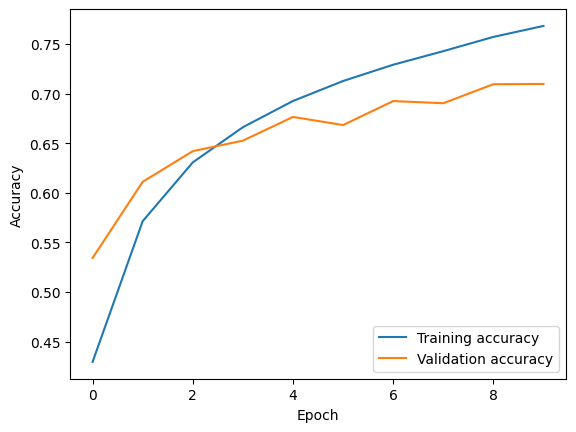

In [ ]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to categorical (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define a simple model for CIFAR-10 (starting point)
def create_base_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(20, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Build the base model
model = create_base_model()
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Function to compute activation variance for a given layer
def compute_activation_variance(model, layer_idx, x_data):
    # Create a temporary model to extract activations
    temp_model = tf.keras.Model(inputs=model.input, outputs=model.layers[layer_idx].output)
    activations = temp_model(x_data)
    variance = tf.reduce_mean(tf.math.reduce_variance(activations, axis=0))  # Variance of activations across neurons
    return variance.numpy()

# Function to compute gradient flow (simplified version)
def compute_gradient_flow(model, x_data, y_data):
    with tf.GradientTape() as tape:
        predictions = model(x_data)
        loss = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_data, predictions))
    grads = tape.gradient(loss, model.trainable_variables)
    grad_norms = [tf.reduce_mean(tf.abs(grad)) for grad in grads if grad is not None]
    return grad_norms

# Function to check if a layer needs growth
def needs_growth(model, x_data, layer_idx, threshold=0.05):
    # Get variance and gradient flow for the layer
    activation_variance = compute_activation_variance(model, layer_idx, x_data)
    grad_flow = compute_gradient_flow(model, x_data, y_train)

    # If variance or gradient flow is below threshold, it's a sign the layer needs growth
    if activation_variance < threshold or np.mean(grad_flow) < threshold:
        return True
    return False

# Function to add neurons to a target layer (example for Dense layer)
def add_neurons_to_layer(model, layer_idx, num_neurons=10):
    # Get the current layer and add neurons
    layer = model.layers[layer_idx]
    if isinstance(layer, layers.Dense):
        new_units = layer.units + num_neurons
        new_layer = layers.Dense(new_units, activation='relu', name=f'new_{layer.name}')
        model.layers[layer_idx] = new_layer
    elif isinstance(layer, layers.Conv2D):
        new_filters = layer.filters + num_neurons
        new_layer = layers.Conv2D(new_filters, layer.kernel_size, activation='relu', padding='same')
        model.layers[layer_idx] = new_layer
    return model


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 50ms/step - accuracy: 0.3339 - loss: 1.8170 - val_accuracy: 0.5335 - val_loss: 1.3010
--------------------------------------------------
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.5598 - loss: 1.2295 - val_accuracy: 0.6199 - val_loss: 1.0704
--------------------------------------------------
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.6375 - loss: 1.0403 - val_accuracy: 0.6630 - val_loss: 0.9646
Growing model after epoch 3...
--------------------------------------------------
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.4485 - loss: 1.5468 - val_accuracy: 0.6397 - val_loss: 1.0143
--------------------------------------------------
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 50ms/step - accuracy: 0.6639 - loss: 0.9498 - val_accuracy: 0.6699 - val_loss: 0.9441
--------------------------------------------------
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/ste

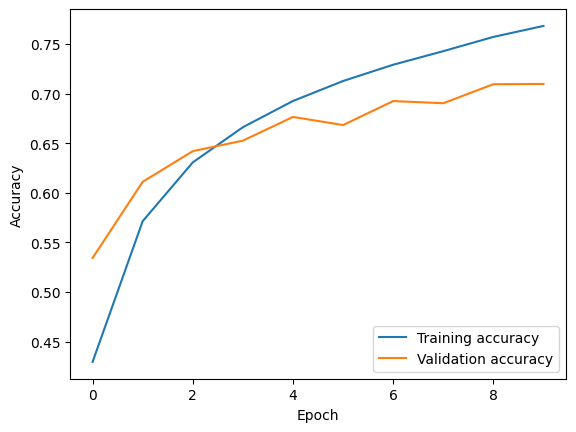

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Create the base model
def create_base_model(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(20, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Function to add neurons to the last dense layer
def add_neurons_to_dense_layer(model, num_new_neurons=10):
    # Get the current dense layers
    dense_layers = [layer for layer in model.layers if isinstance(layer, layers.Dense)]

    if len(dense_layers) == 0:
        raise ValueError("No Dense layers found in the model.")

    last_dense_layer = dense_layers[-1]
    new_units = last_dense_layer.units + num_new_neurons

    # Create a new dense layer with additional neurons
    new_dense_layer = layers.Dense(new_units, activation='relu')

    # Rebuild the model with the new layer
    new_model = models.Sequential()
    for layer in model.layers[:-1]:  # Keep all layers except the last Dense layer
        new_model.add(layer)

    new_model.add(new_dense_layer)  # Add the new dense layer

    # Add the final output layer
    new_model.add(layers.Dense(10, activation='softmax'))

    return new_model

# Training function with growth
def train_with_growth(model, x_train, y_train, x_test, y_test, epochs=10, growth_interval=3, num_new_neurons=10):
    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")

        # Train the model for one epoch
        model.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test))

        # After every 'growth_interval' epochs, check for growth
        if (epoch + 1) % growth_interval == 0:
            print(f"Growing model after epoch {epoch + 1}...")
            model = add_neurons_to_dense_layer(model, num_new_neurons)  # Add neurons to the last dense layer
            model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Re-compile after growth
        print("-" * 50)
    return model

# Build and compile the base model
model = create_base_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with growth
model = train_with_growth(model, x_train, y_train, x_test, y_test, epochs=10, growth_interval=3, num_new_neurons=4)

# Final evaluation
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

# Plot training & validation accuracy - IGNORE IMAGE BELOW, I didn't capture history for growth case
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print(model.summary())

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 20)                  │          20,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 14)                  │             294 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 14)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 14)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 10)                  │             150 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 233,054 (910.37 KB)

 Trainable params: 77,684 (303.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 155,370 (606.92 KB)

None


In [ ]:
# Function to check if a layer needs pruning based on various metrics
def needs_pruning(model, x_train, layer_idx, gradient_threshold=0.01, activation_threshold=0.1, weight_threshold=0.1):
    """
    Determines if a layer is prunable based on gradient, activation, and weight metrics.
    """
    layer = model.layers[layer_idx]

    # Ensure x_train is a Tensor
    x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)

    # 1. Check gradients
    gradients = get_layer_gradients(model, x_train)
    if np.max(np.abs(gradients[layer_idx])) < gradient_threshold:
        return True  # Prune if gradients are too small

    # 2. Check activations
    activations = get_layer_activations(model, x_train)
    if np.mean(np.abs(activations[layer_idx])) < activation_threshold:
        return True  # Prune if activation is too small

    # 3. Check weights (magnitude of weights)
    weights = layer.get_weights()[0]  # Weights for dense layers
    if np.mean(np.abs(weights)) < weight_threshold:
        return True  # Prune if weights are too small

    return False

# Helper function to get gradients for each layer
def get_layer_gradients(model, x_train):
    """
    Calculates gradients for each layer of the model with respect to a batch of inputs.
    """
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(x_train)  # Watch the input tensor
        predictions = model(x_train, training=True)
    gradients = tape.gradient(predictions, model.trainable_variables)
    return gradients

# Helper function to get activations for each layer
def get_layer_activations(model, x_train):
    """
    Calculates activations for each layer of the model for a batch of inputs.
    """
    activations = []
    for layer in model.layers:
        activations.append(layer(x_train, training=False).numpy())  # Extract activations
    return activations

# Function to rebuild the model after pruning a layer
def rebuild_model_after_pruning(model, layer_idx_to_remove):
    """
    Rebuilds the model after pruning a layer. It removes the specified layer.
    """
    new_model = tf.keras.Sequential()

    input_layer = model.layers[0]  # Preserve the input layer
    new_model.add(input_layer)

    # Add layers from the original model except the one to be pruned
    for i, layer in enumerate(model.layers[1:]):  # Start from 1 to skip input layer
        if i != layer_idx_to_remove:
            new_model.add(layer)

    # After pruning, ensure the output layer has the correct number of units (e.g., 10 for CIFAR-10)
    if isinstance(new_model.layers[-1], tf.keras.layers.Dense):
        new_model.add(tf.keras.layers.Dense(10, activation='softmax'))  # Recreate output layer with 10 units

    # Ensure the model is compiled after changes
    new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return new_model

# Example of pruning during training
def prune_model(model, x_train, y_train, epochs=10, pruning_interval=5):
    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")

        # Train the model for one epoch
        model.fit(x_train, y_train, epochs=1)

        # After every 'pruning_interval' epochs, check for pruning
        if (epoch + 1) % pruning_interval == 0:
            print(f"Pruning after epoch {epoch + 1}...")

            for layer_idx in range(len(model.layers)):
                if len(model.layers)-1 > layer_idx and isinstance(model.layers[layer_idx], tf.keras.layers.Dense):
                    if needs_pruning(model, x_train[:32], layer_idx):  # Check for pruning condition
                        print(f"Layer {layer_idx} is prunable.")

                        # Rebuild the model after pruning the layer
                        model = rebuild_model_after_pruning(model, layer_idx)
        print(model.summary())
        print("-" * 50)
    return model


In [ ]:
import tensorflow as tf

# unweighted
def custom_loss_with_regularization(base_loss, model, lambda_depth=0.01, lambda_width=0.01):
    """
    Custom loss function that includes regularization terms for depth and width.

    Args:
    - base_loss: TensorFlow/Keras loss function (e.g., categorical_crossentropy).
    - model: Keras model whose structure is being regularized.
    - lambda_depth: Weight for the depth regularization term.
    - lambda_width: Weight for the width regularization term.

    Returns:
    - A loss function that combines the base loss with depth and width regularization.
    """
    def loss_function(y_true, y_pred):
        # Base task-specific loss
        task_loss = base_loss(y_true, y_pred)

        # Depth Regularization: Penalize the total number of layers
        depth = len([layer for layer in model.layers if isinstance(layer, tf.keras.layers.Dense)])
        depth_regularization = lambda_depth * depth

        # Width Regularization: Penalize the total number of neurons in the model
        width = sum(layer.units for layer in model.layers if isinstance(layer, tf.keras.layers.Dense))
        width_regularization = lambda_width * width

        # Combine all loss terms
        total_loss = task_loss + depth_regularization + width_regularization
        return total_loss

    return loss_function

